In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Not needed in Google Colab
%matplotlib inline  

# Data from Anthony Plechacek

I asked AP to email data to me to show as example of data analysis

Using package named **pandas** for importing and slicing data.  The name pandas is derived from **pan**el **da**ta, a term used in some social sciences for a data set.

The pandas command `pd.read_csv` will read a **c**omma-**s**eparated **v**alue file.  You can save an Excel spreadsheet as a `.csv` file if you put the name of the data in the top row, followed by all data immediately below.  Make sure that your `.csv` file is in the same directory as this Jupyter notebook.  I recommend **not** using any spaces in the filename.  

Change the filename below to your data file.

In [3]:
filename = 'power_meter_readings_Test_2_from_Anthony_Plechacek_Mar_3_2022.csv'   #change this to your filename

df=pd.read_csv(filename)  #Import the file - must be in same directory as this notebook

Note that the title at the beginning of the column (below it is 'Time' and 'Power'), becomes the name of each column.  This means `df['Time']` is the first column of data and `df['Power']` is the data in the second column.

In [4]:
df.head()  #Look at the "head" of the file - the first five lines

,Time,Power
0,4.366,-2.510000e-08
1,7.092,4.780000e-09
2,9.876,9.690000e-09
3,12.690,-2.470000e-08
4,15.352,-5.560000e-08


The `.describe()` command pulls up an overview of the data.  It isn't always needed but can occasionally give you a good sense of the data.

In [6]:
df.describe()  #printout stats of all the data

,Time,Power
count,214087.000000,2.140870e+05
mean,502728.052907,1.412137e-03
std,287590.543433,1.178785e-04
min,4.366000,-2.200000e-07
25%,255043.691000,1.406900e-03
50%,503680.428000,1.448200e-03
75%,751555.599500,1.470500e-03
max,999985.645000,1.508500e-03


All of the data is stored in a dataframe we decided to name `df`.  To access each column of data, you use the name of each column.  For example, to access the in the column named Time, use `df.['Time']`.  

The quote marks around 'Time' indicate that this is a string of text and not some variable named `Time`.

In [39]:
time_data = df['Time']  #Use the 'Time' column and assign it to a variable named time

print(time_data)  #print the new variable named time_data

0              4.366
1              7.092
2              9.876
3             12.690
4             15.352
             ...    
214082    999974.659
214083    999977.370
214084    999980.208
214085    999983.006
214086    999985.645
Name: Time, Length: 214087, dtype: float64


The `plt.plot()` command will plot the first variable along the horizontal axis and the second variable along the vertical axis

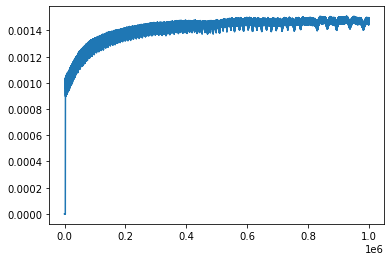

In [38]:
plt.plot(df['Time'],df['Power'])  #plot power vs. time

All data should have axes labeled and include a title.

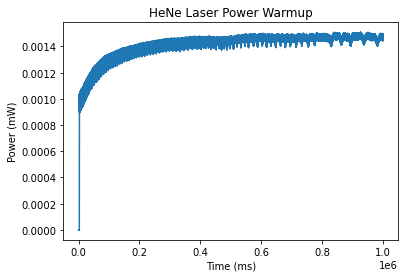

In [19]:
plt.plot(time,power)
plt.xlabel("Time (ms)")  #Add xlabel
plt.ylabel("Power (mW)")  #Add ylabel
plt.title("HeNe Laser Power Warmup")  #Add title
plt.show()

You can use `figsize=` to change the size of the graph.  Play around with the numbers to find a size that works for you.  The first number is the horizontal width and the second number is the height.

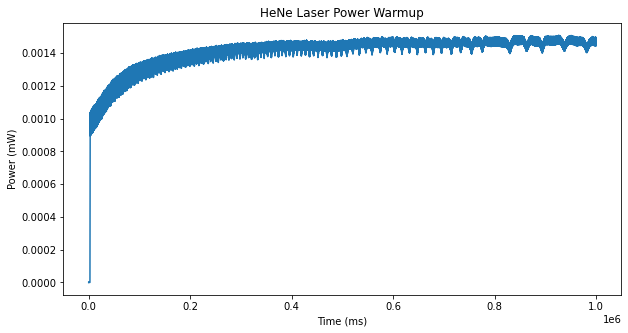

In [40]:
plt.figure(figsize=(10,5))  #Increase the size of the figure
plt.plot(df['Time'],df['Power'])
plt.xlabel("Time (ms)")
plt.ylabel("Power (mW)")
plt.title("HeNe Laser Power Warmup")
plt.show()

One way to focus the graph on a subset of data is to limit the x-scale of the graph using `.xlim()`. This isn't ideal for analyzing the data, but it can be useful in figuring out what ranges of data you want to focus on later.

In the example below we only plot from x=3E3 to x=4E4.

Obviously the "real" data doesn't start until roughly 2750 milliseconds so we'll want to cut that out from our analysis.

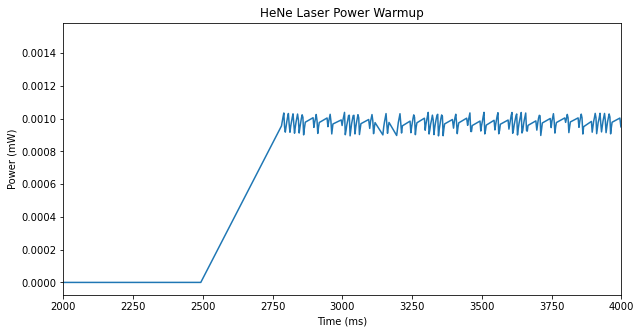

In [41]:
plt.figure(figsize=(10,5))  #Increase the size of the figure
plt.plot(df['Time'],df['Power'])
plt.xlim(2E3,4E3)
plt.xlabel("Time (ms)")
plt.ylabel("Power (mW)")
plt.title("HeNe Laser Power Warmup")
plt.show()

We are going to filter the data so that we exclude all data where the time is less than 2750 milliseconds - we'll bump that up to 3000 milliseconds for simplicity.

If you notice below, the command `df['Time']>3E3` produces a list of True or False values, indicating whether the time data satisfies this condition.  If I feed these True and False values back into `df[]` it will only select values associated with a True statement.  In other words, the first 3000 milliseconds of data won't be included.

In [46]:
df['Time']>3E3

0         False
1         False
2         False
3         False
4         False
          ...  
214082     True
214083     True
214084     True
214085     True
214086     True
Name: Time, Length: 214087, dtype: bool

So `df[df['Time']>3E3]` returns only data rows (so it includes both data rows (time and power)) where the time is greater than 3000.

I created a variable named `data_after_3sec` to contain this data.  If you look at the `head()` of the data you'll see it starts after time 3000

In [47]:
data_after_3sec = df[df['Time']>3E3]
data_after_3sec.head()

,Time,Power
548,3002.007,0.000989
549,3005.028,0.001014
550,3007.886,0.001038
551,3010.655,0.000902
552,3013.310,0.000929


The columns are still named 'Time' and 'Power' so `data_after_3sec['Time']` yields the first column of data like below.

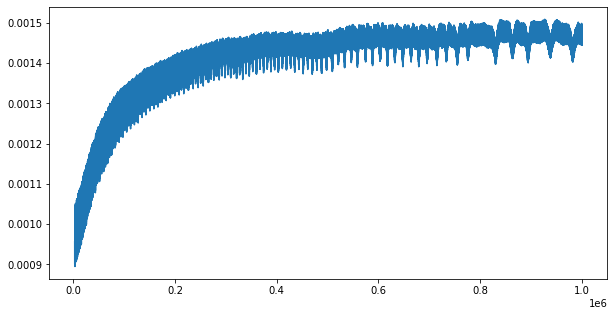

In [45]:
data_after_3sec = df[df['Time']>3E3]

plt.figure(figsize=(10,5))  
plt.plot(data_after_3sec['Time'],data_after_3sec['Power'])

I'd like to look at the average of the power data so I can use the `.mean()` command and the `.std()` command to get the average (mean) value and the standard deviation.

I'm also using some "fancy" commands to format the numbers.  If you place an `f` in front of the opening quote inside the print statement, then place the variable name inside curly braces, you can get the numbers printed out.  We'll show how to format these numbers more in a minute.

Thus `print(f"Print this number {my_x}")` will print out the value of the variable named `my_x`.

In [53]:
mean_after_3sec = data_after_3sec['Power'].mean()
stand_dev_after_3sec = data_after_3sec['Power'].std()

print(f"The average is {mean_after_3sec} and the standard deviation is {stand_dev_after_3sec}") 

The average is 0.0014155275851249658 and the standard deviation is 9.608428061058285e-05


---

We can also use the `.describe()` command to get a bunch of stats on the data.

In [55]:
data_after_3sec.describe()

,Time,Power
count,213539.000000,213539.000000
mean,504014.595036,0.001416
std,286834.336167,0.000096
min,3002.007000,0.000895
25%,257037.615500,0.001407
50%,504932.365000,0.001448
75%,752192.339000,0.001471
max,999985.645000,0.001509


---

The data seems to have two distinct portions, one part where the signal seems to grow exponentially, and the second part where it oscillates about a stable value.  I'm going to split the data into two data sets.

The first data set, called `early_time_data` is between the times 3000 ms and 600000 ms (or 3E3 and 6E5).  To do that, I need to specify two conditions the data must meet: `df['Time']>3E3` **and** `df['Time']<6E5`.  If I put each condition inside parentheses and join them with the **and** symbol `&`, I will only get data satisfying both conditions:

In [57]:
(df['Time']>3E3) & (df['Time']<6E5)

0         False
1         False
2         False
3         False
4         False
          ...  
214082    False
214083    False
214084    False
214085    False
214086    False
Name: Time, Length: 214087, dtype: bool

---

Putting this two conditions inside the square brackets of my original `df[]` data set gives me only the data I want:

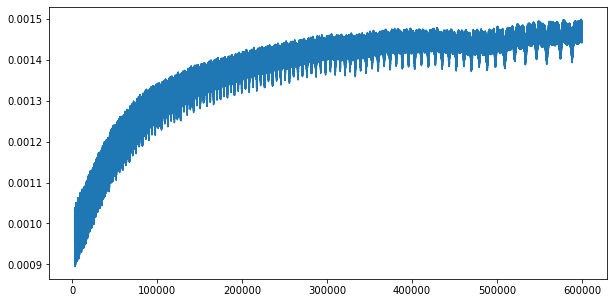

In [42]:
early_time_data = df[(df['Time']>3E3) & (df['Time']<6E5)]

plt.figure(figsize=(10,5))  
plt.plot(early_time_data['Time'],early_time_data['Power'])

The data I'm interested in is the later data when things _appear_ stable (sorta).  This seems to happen after 6E5 ms.

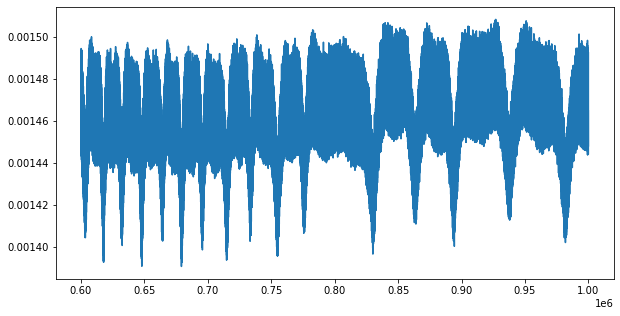

In [58]:
steady_state_data = df[df['Time']>6E5]

plt.figure(figsize=(10,5))  
plt.plot(steady_state_data['Time'],steady_state_data['Power'])

Now I'm going to print out my mean and standard deviation for this data but I'm going to format how the numbers are printed.  I'm going to use scientific notation by adding `:E` to the print statement.

For example, to print `my_x` in scientific notation I could write:
`print(f"My x value in scientific notation is {my_x:E}")`

I'd really only like two sig figs so if I add `.2` after the colon `:` but before the `E`, it will only print two sig figs. 

For example: 
`print(f"My x value in scientific notation is {my_x:.2E}")`

In [60]:
mean_steady_state_data = steady_state_data['Power'].mean()
stand_dev_steady_state_data = steady_state_data['Power'].std()

print(f"The average is {mean_steady_state_data:.2E} and the standard deviation is {stand_dev_steady_state_data:.2E}") 

The average is 1.47E-03 and the standard deviation is 1.93E-05
